In [1]:
import os

In [2]:
#to get the file path in notebooks
# __file__ path no work in Jupiter note
#https://stackoverflow.com/questions/39125532/file-does-not-exist-in-jupyter-notebook
current_dir=os.path.abspath('')

Load dataset

In [3]:
# download the tiny shakespeare dataset
sufix="8maps_nonalpha"
folder=f"microstate_{sufix}_2sE_dataset_pretokenize"
input_file_path = os.path.join(os.path.dirname(current_dir), f"data/{folder}/output_{sufix}_2sE.train.txt")
print(input_file_path)

/home/rjarpa/code/nanoGPT/data/microstate_8maps_nonalpha_2sE_dataset_pretokenize/output_8maps_nonalpha_2sE.train.txt


In [4]:
# Read the text file and store each line as an element in a list
def read_text_file_to_list(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        lines = [line.strip() for line in lines]
    return lines


In [5]:
# Replace 'file_path.txt' with the actual path to your text file
dataset = read_text_file_to_list(input_file_path)

# Print the list
#print(dataset)

**Load tokenizer**

In [6]:
token_file_path = f"{os.path.dirname(current_dir)}/data/tokenizer-output-{sufix}-2sE.json"

In [7]:
#https://huggingface.co/docs/transformers/fast_tokenizers

from transformers import PreTrainedTokenizerFast
tokenizer = PreTrainedTokenizerFast(tokenizer_file=token_file_path)


/opt/anaconda3/envs/gpt/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:


# Tokenize the dataset and count the occurrences
vocab_count = {}
for sentence in dataset:
    encoding = tokenizer.encode(sentence)
    #tokens = encoding.tokens
    for token in encoding:
        vocab_count[token] = vocab_count.get(token, 0) + 1


In [9]:
# Tokenize the dataset and count the occurrences
vocab_count_decoded = {}
for sentence in dataset:
    encoding = tokenizer.encode(sentence)
    #tokens = encoding.tokens
    for token in encoding:
        vocab_count_decoded[tokenizer.decode(token)] = vocab_count_decoded.get(tokenizer.decode(token), 0) + 1


In [10]:
# Optionally, you can sort the vocabulary by count
sorted_vocab_count = {k: v for k, v in sorted(vocab_count.items(), key=lambda item: item[1], reverse=True)}


In [11]:
# Optionally, you can sort the vocabulary by count
sorted_vocab_count_decoded = {k: v for k, v in sorted(vocab_count_decoded.items(), key=lambda item: item[1], reverse=True)}


In [12]:
# Print the result
for token, count in sorted_vocab_count_decoded.items():
    print(f"{token}: {count}")

CCCCCCC: 1464
HHHHHHH: 1433
DDDDDDD: 1412
BBBBBBB: 1399
CCCCCCCCC: 1356
GGGGGGGGG: 1356
GGGGGGG: 1355
DDDDDDDD: 1355
FFFFFFFFF: 1345
FFFFFFF: 1342
AAAAAAAAA: 1341
DDDDDDDDD: 1334
HHHHHH: 1325
CCCCCCCC: 1319
CCCCCC: 1314
BBBBBBBBB: 1296
EEEEEEEEE: 1294
DDDDDD: 1291
HHHHHHHHH: 1279
BBBBBB: 1275
BBBBBBBB: 1271
HHHHHHHH: 1270
AAAAAAAAAA: 1257
EEEEEEEE: 1254
EEEEEEEEEE: 1235
DDDDDDDDDD: 1215
BBBBBBBBBB: 1214
GGGGGGGG: 1213
FFFFFFFF: 1206
FFFFFF: 1176
GG: 1157
EEEEEEE: 1149
CCCCCCCCCC: 1137
AAAAAAA: 1134
FFFFFFFFFF: 1132
GGGGGGGGGG: 1130
FF: 1130
BB: 1117
AAAAAAAAAAA: 1113
AAAEEE: 1111
DD: 1105
AAAAAAAA: 1100
HH: 1084
CC: 1065
HHHHH: 1038
EEEEEEEEEEE: 1035
HHHHHHHHHH: 1032
CCCCC: 1029
EE: 1028
AA: 1024
GGGGGG: 1024
CCCCCCCCCCC: 1021
BBBBBBBBBBB: 1016
AAAAEEEE: 1015
AAADDD: 1015
DDDDD: 1011
FFFEEE: 1004
GGGGGGGGGGG: 1001
GGGEEE: 991
AAACCC: 988
DDDDDDDDDDD: 986
GGGDDD: 981
AAAHHH: 969
BBBBB: 967
EEEEEEEEEEEE: 964
FFFCCC: 951
HHHH: 950
AAABBB: 949
FFFFFFFFFFF: 943
FFFHHH: 930
HHHHHHHHHHH: 929


In [13]:
# Print the result
for token, count in sorted_vocab_count.items():
    print(f"{token}: {count}")
    

66: 1464
69: 1433
65: 1412
67: 1399
75: 1356
73: 1356
64: 1355
43: 1355
79: 1345
68: 1342
72: 1341
76: 1334
61: 1325
41: 1319
60: 1314
77: 1296
74: 1294
57: 1291
80: 1279
59: 1275
42: 1271
45: 1270
81: 1257
38: 1254
82: 1235
84: 1215
89: 1214
39: 1213
44: 1206
58: 1176
16: 1157
63: 1149
90: 1137
62: 1134
88: 1132
86: 1130
20: 1130
19: 1117
91: 1113
100: 1111
17: 1105
34: 1100
21: 1084
18: 1065
53: 1038
93: 1035
95: 1032
52: 1029
15: 1028
14: 1024
56: 1024
97: 1021
98: 1016
131: 1015
105: 1015
49: 1011
110: 1004
96: 1001
111: 991
102: 988
99: 986
108: 981
120: 969
51: 967
104: 964
109: 951
29: 950
113: 949
103: 943
123: 930
107: 929
122: 928
101: 925
127: 920
134: 920
117: 917
121: 915
48: 913
106: 903
25: 900
114: 895
128: 895
119: 894
140: 892
146: 890
130: 887
124: 887
137: 866
115: 864
135: 861
116: 861
155: 858
152: 853
26: 848
27: 846
169: 842
149: 841
40: 839
112: 838
141: 837
139: 837
118: 833
136: 830
132: 825
147: 818
153: 808
160: 808
32: 805
171: 801
157: 799
142: 797
168: 7

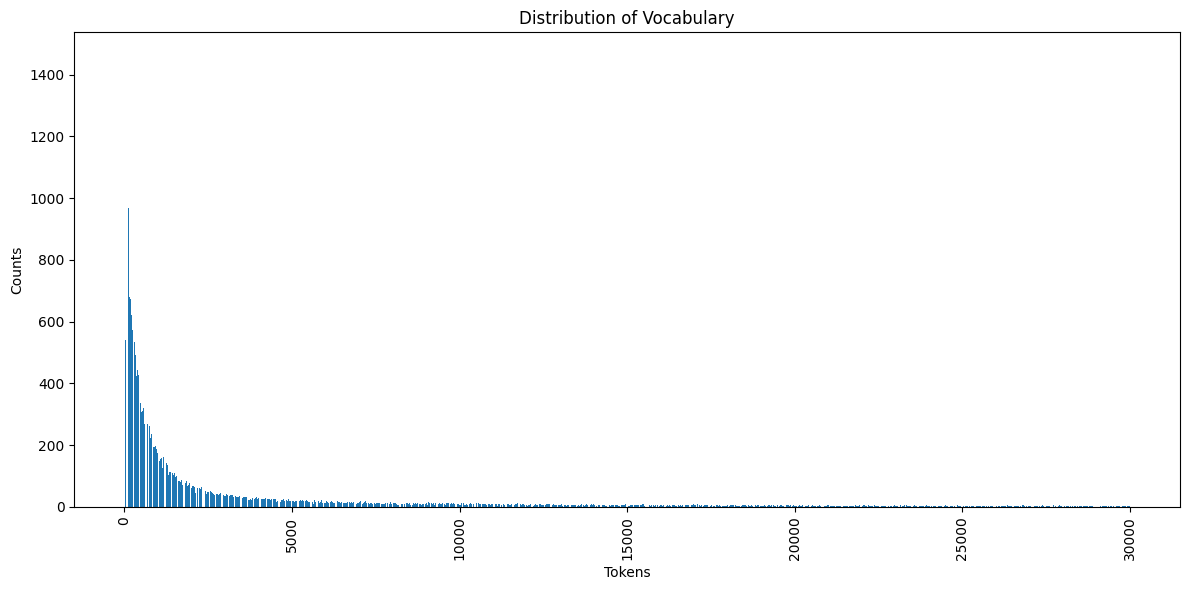

In [14]:
import matplotlib.pyplot as plt

# Your code to calculate sorted_vocab_count goes here...

# Convert the sorted_vocab_count dictionary into two lists: tokens and counts
tokens, counts = zip(*sorted_vocab_count.items())

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(tokens, counts)
plt.xlabel("Tokens")
plt.ylabel("Counts")
plt.title("Distribution of Vocabulary")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [15]:
# Filter vocab_count to include items with at least 100 occurrences
min_occurrences = 100
filtered_vocab_count = {token: count for token, count in sorted_vocab_count_decoded.items() if count >= min_occurrences}


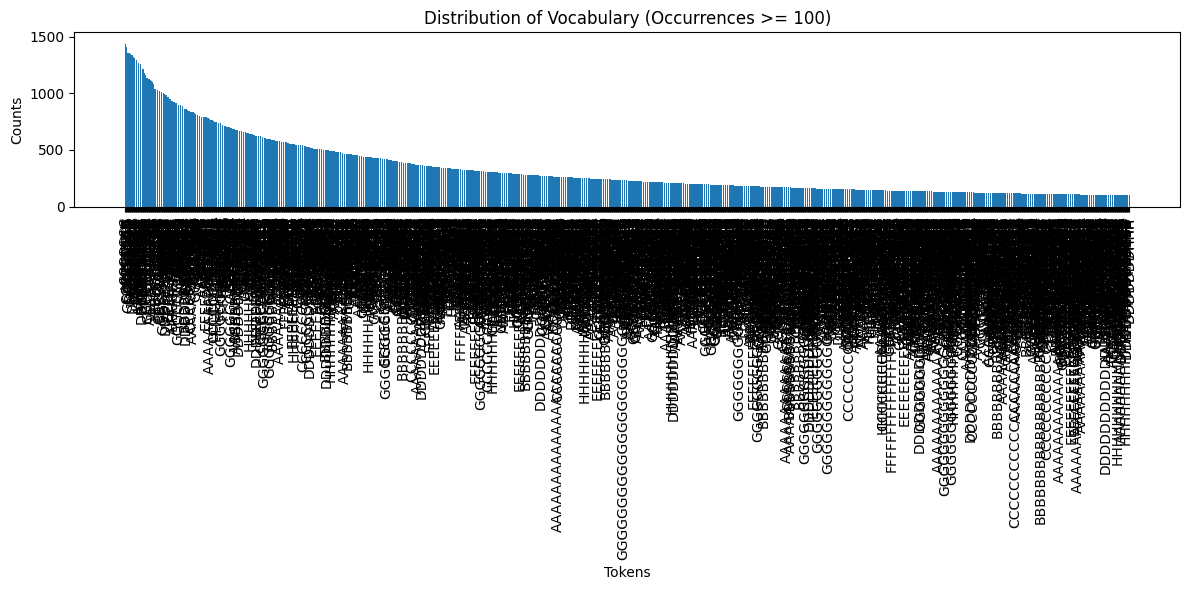

In [16]:
# Convert the filtered_vocab_count dictionary into two lists: tokens and counts
tokens, counts = zip(*filtered_vocab_count.items())

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(tokens, counts)
plt.xlabel("Tokens")
plt.ylabel("Counts")
plt.title(f"Distribution of Vocabulary (Occurrences >= {min_occurrences})")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [17]:
print(f"filtered_vocab_count: {len(filtered_vocab_count)}")
print(f"vocab_count_decoded: {len(vocab_count_decoded)}")

aprox_words=round(len(filtered_vocab_count)*100/95)
print(f"recommended size vocab: {aprox_words}")

filtered_vocab_count: 1483
vocab_count_decoded: 28985
recommended size vocab: 1561


In [18]:
#whole dataset
#filtered_vocab_count: 3637
#vocab_count_decoded: 29572
#recommended size vocab: 3828